# Lorenz system

[![Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/brainpy/examples/blob/main/classical_dynamical_systems/lorenz_system.ipynb)

The Lorenz system, originally intended as a simplified model of atmospheric convection, has instead become a standard example of sensitive dependence on initial conditions; that is, tiny differences in the starting condition for the system rapidly become magnified. The system also exhibits what is known as the "Lorenz attractor", that is, the collection of trajectories for different starting points tends to approach a peculiar butterfly-shaped region.

The Lorenz system includes three ordinary differential equations:

```{code}
dx/dt = sigma ( y - x )
dy/dt = x ( rho - z ) - y
dz/dt = xy - beta z
```
      
where the parameters beta, rho and sigma are usually assumed to be positive. The classic case uses the parameter values

```{code}
beta = 8 / 3
rho = 28
sigma = 10
```

In [1]:
import brainpy as bp
import matplotlib.pyplot as plt

In [2]:
bp.__version__

'2.4.3'

In [3]:
sigma = 10
beta = 8 / 3
rho = 28

In [4]:
dx = lambda x, t, y: sigma * (y - x)
dy = lambda y, t, x, z: x * (rho - z) - y
dz = lambda z, t, x, y: x * y - beta * z

In [5]:
integral = bp.odeint(bp.JointEq([dx, dy, dz]), method='exp_auto')

In [6]:
runner = bp.IntegratorRunner(integral,
                             monitors=['x', 'y', 'z'],
                             inits=dict(x=8, y=1, z=1),
                             dt=0.01)
runner.run(100)

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


  0%|          | 0/10000 [00:00<?, ?it/s]

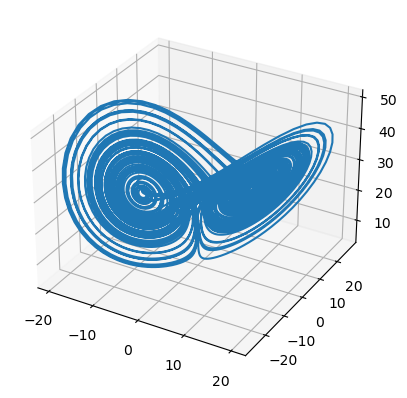

In [7]:
fig = plt.figure()
fig.add_subplot(111, projection='3d')
plt.plot(runner.mon.x[100:, 0], runner.mon.y[100:, 0], runner.mon.z[100:, 0])
plt.show()